# Yêu cầu 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
stock_df = pd.read_csv ('Data_Demo.csv', index_col =['Time'], parse_dates=True)
stock_df.head()

#index_col = ['Chỉ tiêu']: có thể được sử dụng để buộc Pandas sử dụng cột đầu tiên làm chỉ mục
#parse_dates: định dạng cột là ngày

,AA,GOOG
Time,,
2017-01-01,36.268166,796.789978
2017-01-04,33.561737,905.960022
2017-01-08,43.661102,939.330017
2017-01-12,53.601265,1046.400024
2018-01-01,51.760494,1169.939941


In [3]:
#Phần trăm (%) lợi nhuận thay đổi của 2 mã AA, GOOG
r = stock_df.apply(pd.to_numeric, errors='coerce').pct_change()
r

#pd.to_numeric: chuyển chuỗi ký tự thành chuỗi số 
#errors='coerce': 

,AA,GOOG
Time,,
2017-01-01,NaN,NaN
2017-01-04,-0.074623,0.137012
2017-01-08,0.300919,0.036834
2017-01-12,0.227666,0.113986
2018-01-01,-0.034342,0.118062
2018-01-04,-0.015763,-0.130443
2018-01-08,-0.127539,0.197438
2018-01-12,-0.404970,-0.149878
2019-01-01,0.116629,0.077983


In [4]:
#Lợi nhuận kỳ vọng
e_r = stock_df.resample('D').last().pct_change().mean()
e_r

AA      0.001179
GOOG    0.000985
dtype: float64

In [5]:
#Phương sai
var_r = r.var()
var_r

AA      0.160331
GOOG    0.013489
dtype: float64

In [6]:
#Độ lệch chuẩn
r_vol = np.sqrt(var_r)
r_vol

AA      0.400414
GOOG    0.116144
dtype: float64

In [7]:
#Ma trận hiệp phương sai
cov_matrix = stock_df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AA,GOOG
AA,0.129167,0.024021
GOOG,0.024021,0.012134


In [8]:
p_ret = [] # Xác định một mảng lợi nhuận trống để trả về danh mục đầu tư
p_vol = [] # Xác định một mảng độ lệch chuẩn trống cho sự biến động của danh mục đầu tư
p_weights = [] # Xác định một mảng trống cho trọng số của danh mục đầu tư

num_assets = len(stock_df.columns)
num_portfolios = 1000 #Giới hạn số phần tử của danh mục đầu tư là 1000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r) # Lợi nhuận là tích số của lợi nhuận kỳ vọng của từng tài sản và trọng số của nó 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Phương sai danh mục đầu tư
    sd = np.sqrt(var) # Độ lệch chuẩn hằng quý
    p_vol.append(sd)

In [9]:
# Tạo khung dữ liệu cho danh mục đầu tư
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(stock_df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,AA weight,GOOG weight
0,0.001036,0.157345,0.261906,0.738094
1,0.001099,0.241773,0.588729,0.411271
2,0.001112,0.259756,0.653331,0.346669
3,0.001074,0.206532,0.458650,0.541350
4,0.001047,0.171238,0.320374,0.679626


[Text(0.5, 1.0, 'ĐƯỜNG CONG HIỆU QUẢ')]

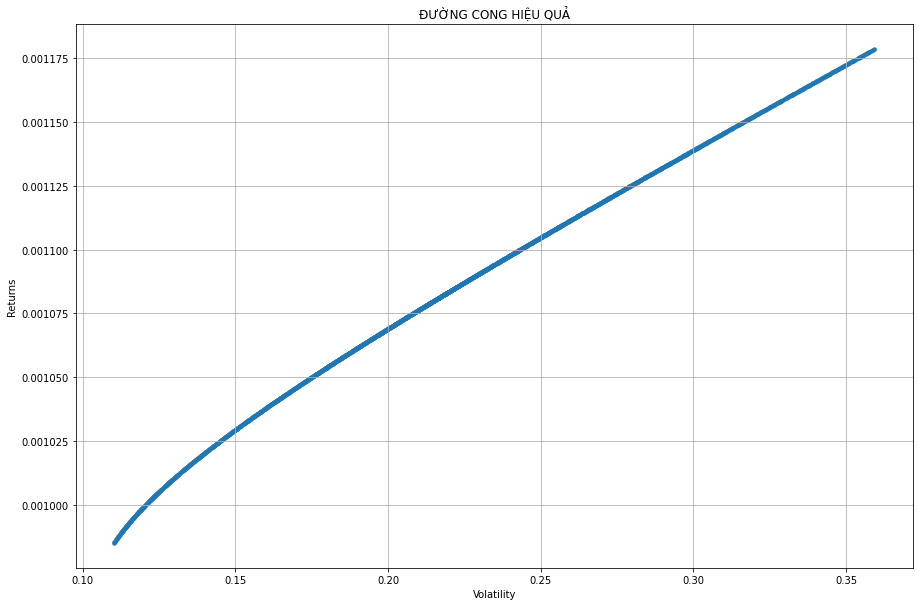

In [21]:
# Vẽ đường biên hiệu quả
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, 
                        alpha=0.3, grid=True, figsize=[15,10]).set(title = 'ĐƯỜNG CONG HIỆU QUẢ')

In [24]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin () cho biết giá trị nhỏ nhất trong cột được chỉ định.                              
min_vol_port

Returns        0.000985
Volatility     0.110167
AA weight      0.000132
GOOG weight    0.999868
Name: 6727, dtype: float64